# Diet Type Recommendation Model

## Project Goal

The goal of this project is to **recommend the most suitable diet type** for a user based on their body measurements, body composition, workout frequency, and fitness goal. The model predicts whether the user should follow **( Balanced, High-Protein, Low-Carb )**

> For example: A 28-year-old male, 1.75 m tall, weighing 72 kg, with BMI 23.5, Fat% 15, working out 6 days per week, and aiming to maintain his weight → **Recommended Diet Type: Balanced**

## Business Understanding

* In today’s fitness and wellness industry, personalized diet recommendations are crucial for achieving specific goals like **weight loss, muscle gain, or maintenance.** Automating diet suggestions using a machine learning model:

> Reduces the need for a personal dietitian for basic recommendations.

> Helps users quickly identify a suitable diet based on objective data.

> Can be integrated into fitness apps, gyms, or online wellness platforms.

## Problem Type

> **Type:** Supervised Machine Learning

> **Category:** Multi-class Classification

> **Target Variable:** Diet_Type (Balanced, High-Protein, Low-Carb)

> **Input Features:** Age (numeric), Gender (0 = Male, 1 = Female), Height (m), Weight (kg), BMI, Fat%, Workout Frequency (days/week), Goal_Label (0 = Maintain, 1 = Muscle Gain, 2 = Weight Loss)


## Objectives

> Build a predictive model to recommend a suitable diet type for a user.

> Ensure the model handles imbalanced classes and provides reliable predictions.

> Allow easy integration of the model into a fitness or wellness platform.

> Visualize predictions and evaluate the accuracy and performance of the model.



# Dataset Description

## Summary

* The dataset used in this project is synthetic and designed to simulate realistic user data for diet recommendation purposes. It contains 3030 (before cleaning) examples, each representing a unique individual with body measurements, body composition, workout habits, and fitness goals.

* The target variable is **Diet_Type**, which indicates the recommended diet for the user. The dataset was generated to ensure diversity across different body types and goals, and later balanced using SMOTE to handle class imbalance.

## Feature Overview

* **Age:** Age of the user in years

* **Gender:** Encoded gender (e.g., 0 = Female, 1 = Male)
* **Weight (kg):** Body weight in kilograms
* **Height (m):** Height in meters
* **BMI:** Body Mass Index calculated as Weight / (Height²)
* **Fat%:** Body fat percentage
* **Workout_Frequency:** Number of workout days per week
* **Goal_Label:** Fitness goal: 0 = Maintain, 1 = Muscle Gain, 2 = Weight Loss
* **Diet_Type:** **Target variable:** Balanced, High-Protein, Low-Carb

# Project Workflow

1.  **Data Cleaning:** Fixing missing values, correcting inconsistent formats, removing outliers and duplicates, standardizing labels, and converting all features into clean, consistent, analysis-ready inputs for the model.

2.  **Data Preprocessing:** Encoding categorical variables, scaling features, and handling missing values.

3. **Data Splitting:** Creating training, validation, and test sets to ensure fair model evaluation.

4. **Model Building:** Training and comparing multiple algorithms (e.g., Logistic Regression, Random Forest, SVM, Gradient Boosting).

5. **Evaluation:** Measuring model performance using accuracy, confusion matrices, and cross-validation.

6. **Fine-Tuning:** Optimizing hyperparameters to improve predictive accuracy.

7. **Visualization:** Presenting results through comparative plots and performance charts.   



# Exploratory Data Analysis (EDA)

> The goal of this step is to explore the dataset, identify patterns, detect outliers, check correlations, and understand the relationship between different features and the target variable Diet_Type.

### Important Libraries

In [ ]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Label Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# SMOTE for balance issue
from imblearn.over_sampling import SMOTE

# Splitting data
from sklearn.model_selection import train_test_split

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fine-Tuning methods
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

# Progress Bar
from tqdm import tqdm

# Manipulate text
import re

# Interface part
import joblib

### Data Cleaning

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/Diet_Type_Dataset_bad.csv')

In [ ]:
# Display basic info before cleaning
df.info()

# Summary statistics before cleaning
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3000 non-null   float64
 1   Gender             3030 non-null   int64  
 2   Height             2940 non-null   object 
 3   Weight             2940 non-null   object 
 4   BMI                2880 non-null   float64
 5   Fat%               2966 non-null   float64
 6   Workout_Frequency  2908 non-null   float64
 7   Goal               2973 non-null   object 
 8   Diet_Type          2969 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 213.2+ KB


,Age,Gender,BMI,Fat%,Workout_Frequency
count,3000.000000,3030.000000,2880.000000,2966.000000,2908.000000
mean,38.654333,0.490099,29.157847,22.326703,3.505502
std,12.040231,0.499984,14.183081,7.782347,1.720284
min,18.000000,0.000000,12.000000,10.000000,1.000000
25%,28.000000,0.000000,21.900000,16.000000,2.000000
50%,39.000000,0.000000,27.400000,23.000000,4.000000
75%,49.000000,1.000000,33.600000,28.000000,5.000000
max,59.000000,1.000000,200.300000,190.400000,6.000000


In [ ]:
# Display first few rows before cleaning
df.head()

,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency,Goal,Diet_Type
0,30.0,0,1.66,106.2,38.5,24.0,2.0,Maintain,Balanced / Plant / Based
1,48.0,0,1.53,99.3,42.4,30.0,4.0,Muscle Gain,High Protein
2,50.0,0,1.82,108.0,32.6,18.0,6.0,Muscle Gain,Balanced / Plant-Based
3,56.0,1,1.71,80.3,27.5,16.0,2.0,Muscle Gain,High Protein
4,54.0,0,1.87,98.2,28.1,24.0,6.0,Maintain,Balanced / Plant-Based


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Age,30
Gender,0
Height,90
Weight,90
BMI,150
Fat%,64
Workout_Frequency,122
Goal,57
Diet_Type,61


Number of duplicate rows: 21


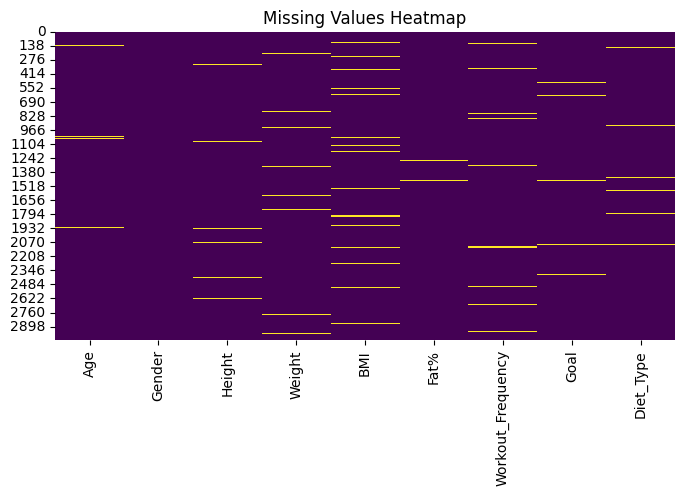

In [ ]:
# Check duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Visual check for missing data ( If purpule no missing values, if there is yellow parts it means there is missing values)
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Remove Duplicates
df = df.drop_duplicates()

In [ ]:
# Clean height if it has characters like 'm' or 'cm'
df['Height'] = df['Height'].astype(str).str.replace("m","", regex=False).str.replace("cm","", regex=False)
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

# Clean weight if 'kg' appears
df['Weight'] = df['Weight'].astype(str).str.replace("kg","", regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Convert fat% if written as "25%"
df['Fat%'] = df['Fat%'].astype(str).str.replace("%","", regex=False)
df['Fat%'] = pd.to_numeric(df['Fat%'], errors='coerce')

# Convert Gender to numeric
df['Gender'] = df['Gender'].map({"Male":0, "Female":1, 0:0, 1:1})

In [ ]:
# Dealing with Diet_Type Column
def clean_diet(x):

    if pd.isna(x):
        return x

    # lowercase for uniform cleaning
    clean = x.lower().strip()

    # remove weird separators like -/- or //-- or multiple ---
    clean = re.sub(r'[-/]{2,}', '/', clean)

    # normalize separators: "-", "_", "/", " " → " "
    clean = re.sub(r'[-_/]', ' ', clean)

    # collapse multiple spaces
    clean = re.sub(r'\s+', ' ', clean).strip()

    # -------- MAPPING into final categories -------- #

    # HIGH PROTEIN
    if "high" in clean and "protein" in clean:
        return "High Protein"

    # BALANCED / PLANT-BASED
    if ("balanced" in clean) or ("plant" in clean):
        return "Balanced / Plant-Based"

    # LOW CARB / LOW FAT
    if "low carb" in clean or "low fat" in clean:
        return "Low Carb / Low Fat"

    # fallback
    return "Balanced / Plant-Based"

# Apply cleaning
df["Diet_Type"] = df["Diet_Type"].apply(clean_diet)



In [ ]:
# Our main classes for Goal column
valid_goals = ["Maintain", "Muscle Gain", "Weight Loss"]

In [ ]:
# Checking for the different values in Goal column before dealing with it
df["Goal"].value_counts()

,count
Goal,
Weight Loss,955
Maintain,946
Muscle Gain,939
UNKNOWN_@@@,30
maintain,13
MG,13
True,11
weight_loss,10
False,9


In [ ]:
# Dealing with Goal Column
def clean_goal(x):
    if pd.isna(x):
        return None

    text = str(x).lower().strip()

    # Remove non-letter characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Handle bad or useless values
    if text in ["", "UNKNOWN_@@@", "True","False", "missing", "mis", "none", "na", "n", "u", "x"]:
        return None

    # MUSCLE GAIN variations
    if any(word in text for word in ["muscle", "gain", "bulk", "mass", "strength",'MG']):
        return "Muscle Gain"

    # MAINTAIN variations
    if any(word in text for word in ["maintain", "maintenance", "stable", "stay"]):
        return "Maintain"

    # WEIGHT LOSS variations
    if any(word in text for word in ["loss", "lose", "cut", "shred", "fat", "slim",'WL']):
        return "Weight Loss"

    # Abbreviations
    if text.startswith("m"):
        # "m" could be maintain or muscle → ambiguous → reject
        return None

    return None  # mark as invalid


In [ ]:
# Applying the function above on Goal column
df["Goal"] = df["Goal"].apply(clean_goal)


In [ ]:
# Dropping rows that cannot be understood
df = df.dropna(subset=["Goal"])


In [ ]:
# Checking for the different values in Goal column after dealing with it
df["Goal"].value_counts()

,count
Goal,
Maintain,968
Weight Loss,965
Muscle Gain,947


In [ ]:
# Numerical columns → fill with median
num_cols = ['Age','Height','Weight','BMI','Fat%','Workout_Frequency']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns → fill with mode
df['Goal'] = df['Goal'].fillna(df['Goal'].mode()[0])
df['Diet_Type'] = df['Diet_Type'].fillna(df['Diet_Type'].mode()[0])


In [ ]:
# Recalculate BMI
df['BMI'] = df['Weight'] / (df['Height']**2)


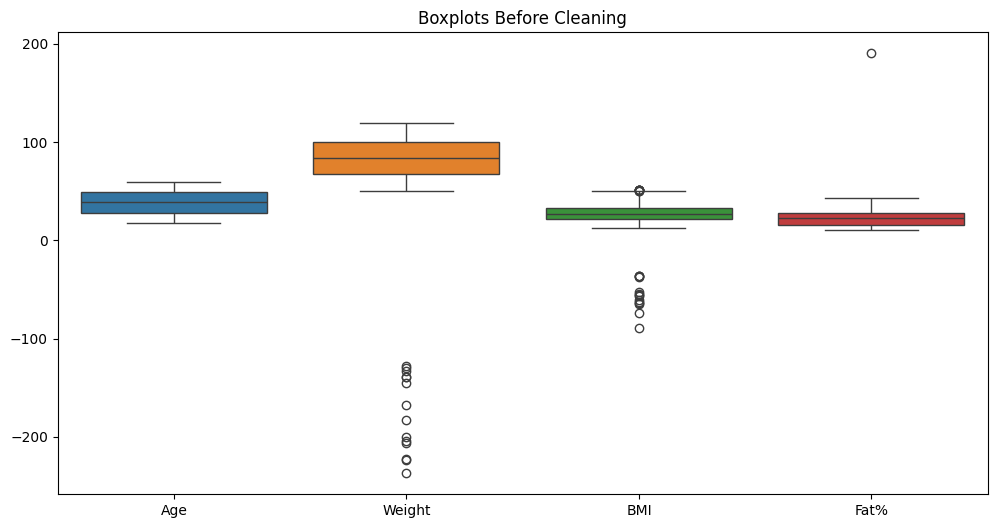

In [ ]:
# Visualization – Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age','Weight','BMI','Fat%']])
plt.title("Boxplots Before Cleaning")
plt.show()

In [ ]:
# Removing outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['Age','Height','Weight','BMI','Fat%']:
    df = remove_outliers(df, col)


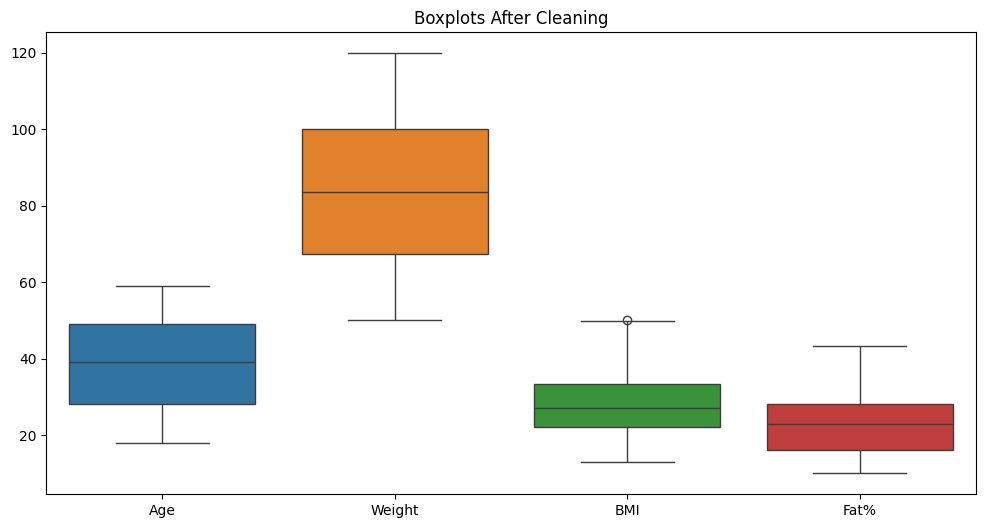

In [ ]:
# Visualization – Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Age','Weight','BMI','Fat%']])
plt.title("Boxplots After Cleaning")
plt.show()


In [ ]:
# Display basic info after cleaning
df.info()

# Summary statistics after cleaning
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 0 to 3029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2844 non-null   float64
 1   Gender             2844 non-null   int64  
 2   Height             2844 non-null   float64
 3   Weight             2844 non-null   float64
 4   BMI                2844 non-null   float64
 5   Fat%               2844 non-null   float64
 6   Workout_Frequency  2844 non-null   float64
 7   Goal               2844 non-null   object 
 8   Diet_Type          2844 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 222.2+ KB


,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency
count,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000,2844.000000
mean,38.624824,0.490506,1.748003,83.900136,27.998289,22.351195,3.514768
std,11.982087,0.499998,0.140361,19.512357,7.982012,7.051729,1.686509
min,18.000000,0.000000,1.500000,50.000000,12.830323,10.000000,1.000000
25%,28.000000,0.000000,1.630000,67.475000,22.008052,16.000000,2.000000
50%,39.000000,0.000000,1.740000,83.600000,27.100575,23.000000,4.000000
75%,49.000000,1.000000,1.870000,100.000000,33.250170,28.000000,5.000000
max,59.000000,1.000000,2.000000,119.900000,50.121191,43.200000,6.000000


In [ ]:
# Display first few rows after cleaning
df.head()

,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency,Goal,Diet_Type
0,30.0,0,1.66,106.2,38.539701,24.0,2.0,Maintain,Balanced / Plant-Based
1,48.0,0,1.53,99.3,42.419582,30.0,4.0,Muscle Gain,High Protein
2,50.0,0,1.82,108.0,32.604758,18.0,6.0,Muscle Gain,Balanced / Plant-Based
3,56.0,1,1.71,80.3,27.461441,16.0,2.0,Muscle Gain,High Protein
4,54.0,0,1.87,98.2,28.082015,24.0,6.0,Maintain,Balanced / Plant-Based


In [ ]:
# Check duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3


In [ ]:
# Remove Duplicates
df = df.drop_duplicates()

In [ ]:
# Saving the cleaned file
df.to_csv("Diet_Type_Clean.csv", index=False)


In [ ]:
# Loading the cleaned dataset
diet_df = pd.read_csv('/content/Diet_Type_Clean.csv')

In [ ]:
# Display basic info
diet_df.info()

# Summary statistics
diet_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2841 non-null   float64
 1   Gender             2841 non-null   int64  
 2   Height             2841 non-null   float64
 3   Weight             2841 non-null   float64
 4   BMI                2841 non-null   float64
 5   Fat%               2841 non-null   float64
 6   Workout_Frequency  2841 non-null   float64
 7   Goal               2841 non-null   object 
 8   Diet_Type          2841 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 199.9+ KB


,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency
count,2841.00000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000
mean,38.63006,0.490672,1.747895,83.871062,27.993071,22.351918,3.515312
std,11.98685,0.500001,0.140325,19.501480,7.983572,7.055101,1.687108
min,18.00000,0.000000,1.500000,50.000000,12.830323,10.000000,1.000000
25%,28.00000,0.000000,1.630000,67.400000,22.000085,16.000000,2.000000
50%,39.00000,0.000000,1.740000,83.600000,27.070023,23.000000,4.000000
75%,49.00000,1.000000,1.870000,100.000000,33.240997,28.000000,5.000000
max,59.00000,1.000000,2.000000,119.900000,50.121191,43.200000,6.000000


In [ ]:
# Display first few rows
diet_df.head()

,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency,Goal,Diet_Type
0,30.0,0,1.66,106.2,38.539701,24.0,2.0,Maintain,Balanced / Plant-Based
1,48.0,0,1.53,99.3,42.419582,30.0,4.0,Muscle Gain,High Protein
2,50.0,0,1.82,108.0,32.604758,18.0,6.0,Muscle Gain,Balanced / Plant-Based
3,56.0,1,1.71,80.3,27.461441,16.0,2.0,Muscle Gain,High Protein
4,54.0,0,1.87,98.2,28.082015,24.0,6.0,Maintain,Balanced / Plant-Based


In [ ]:
# Check for missing values
diet_df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Fat%,0
Workout_Frequency,0
Goal,0
Diet_Type,0


Number of duplicate rows: 0


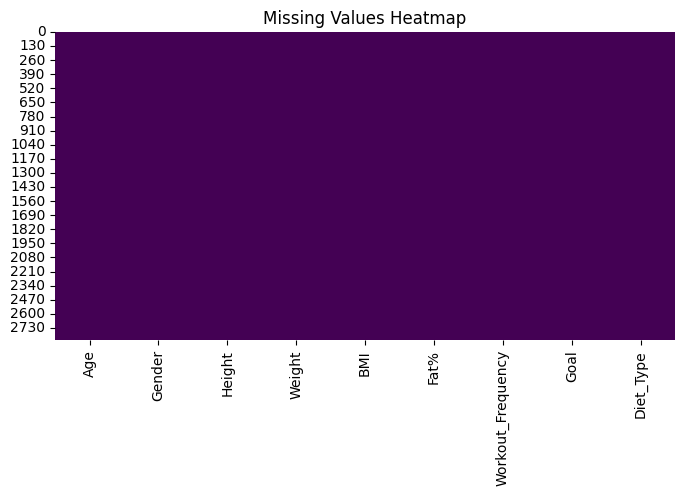

In [ ]:
# Check duplicate entries
duplicates = diet_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Visual check for missing data ( If purpule no missing values, if there is yellow parts it means there is missing values)
plt.figure(figsize=(8,4))
sns.heatmap(diet_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

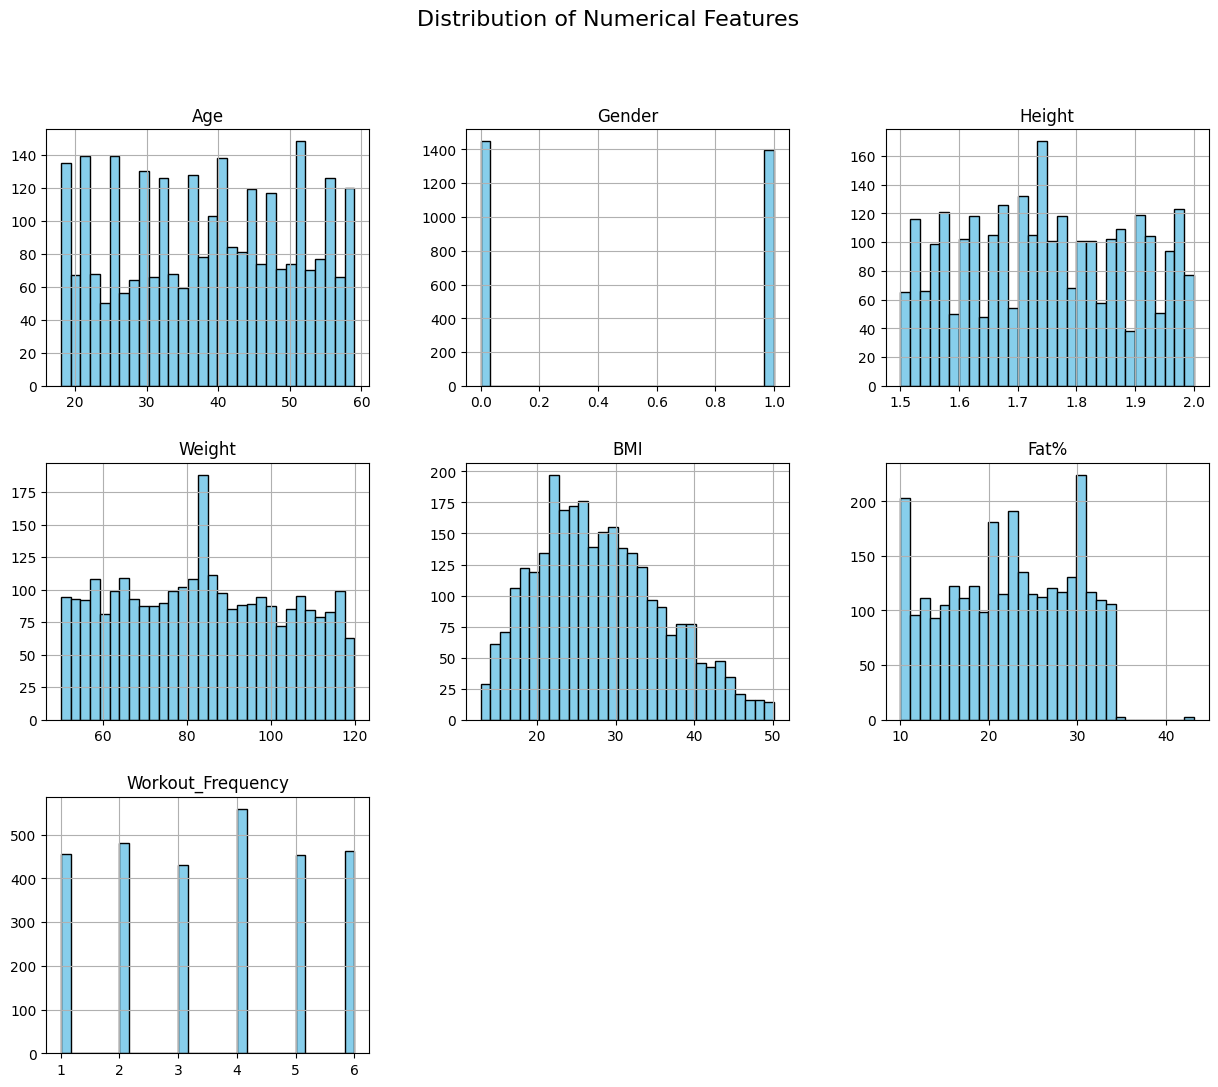

In [ ]:
# Distribution of Numerical Features
num_cols = diet_df.select_dtypes(include=['float64', 'int64']).columns

# Histograms for numerical features
diet_df[num_cols].hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

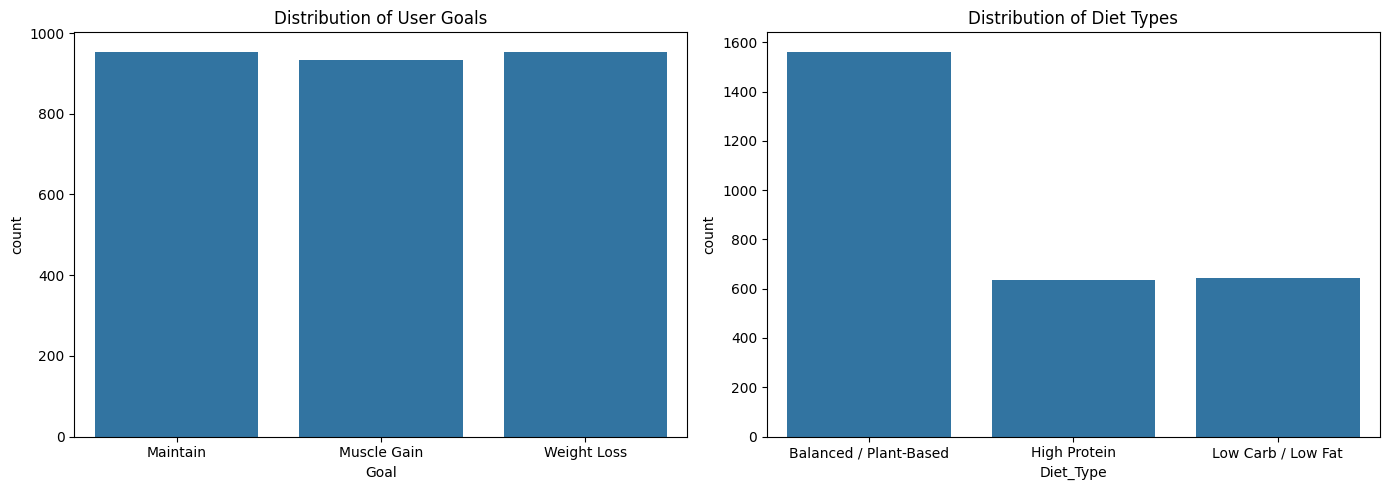

In [ ]:
# Two plots in one row
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Distribution of User Goals
sns.countplot(x='Goal', data=diet_df, ax=axes[0])
axes[0].set_title("Distribution of User Goals")

# Distribution of Diet Types
sns.countplot(x='Diet_Type', data=diet_df, ax=axes[1])
axes[1].set_title("Distribution of Diet Types")

plt.tight_layout()
plt.show()


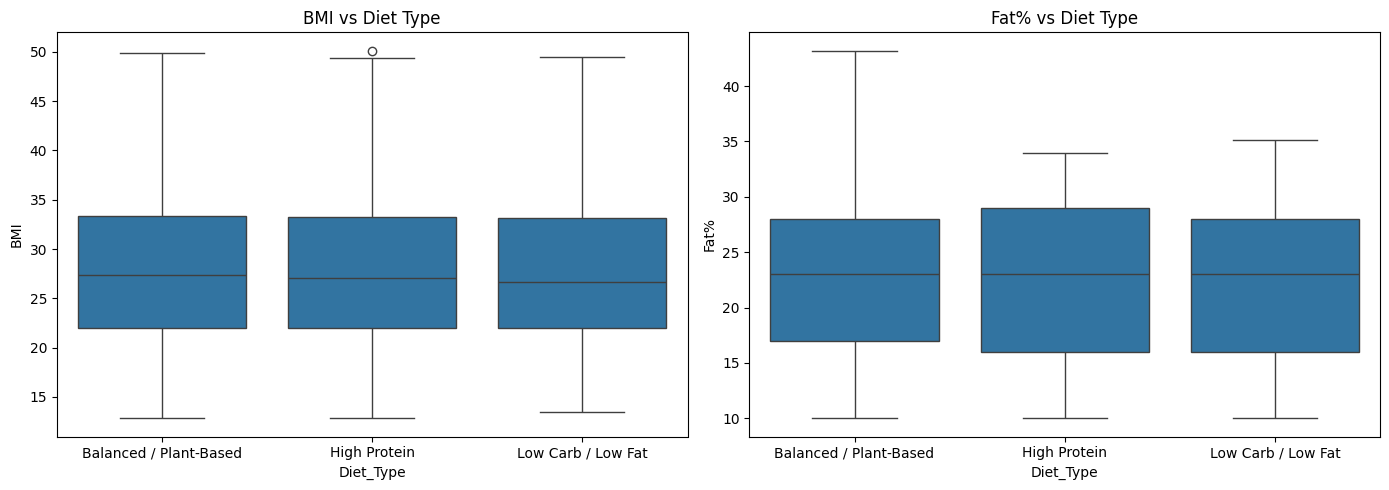

In [ ]:
# Two boxplots in one row
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Box plot of BMI vs Diet Type
sns.boxplot(x='Diet_Type', y='BMI', data=diet_df, ax=axes[0])
axes[0].set_title("BMI vs Diet Type")

# Box plot of Fat% vs Diet Type
sns.boxplot(x='Diet_Type', y='Fat%', data=diet_df, ax=axes[1])
axes[1].set_title("Fat% vs Diet Type")

plt.tight_layout()
plt.show()


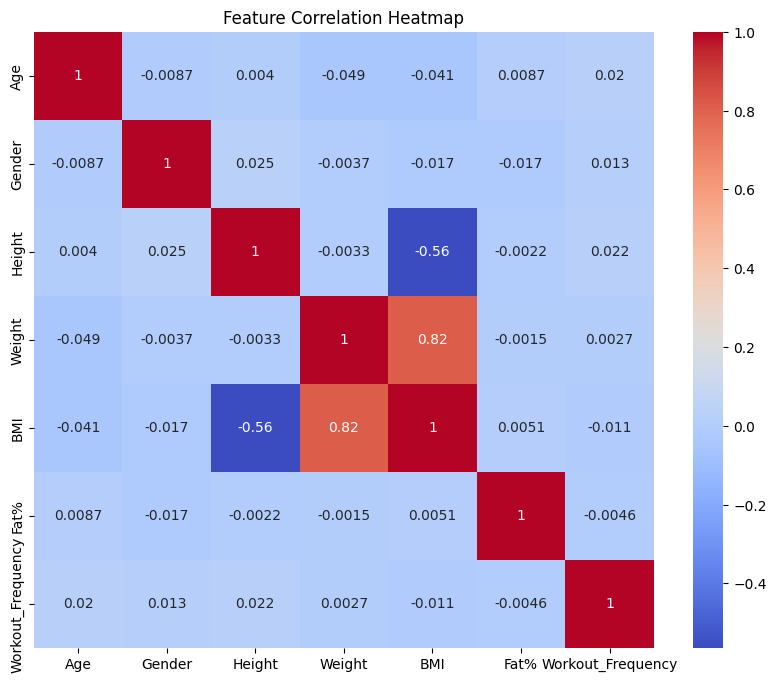

In [ ]:
# Feature Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(diet_df.drop(columns=['Goal', 'Diet_Type']).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

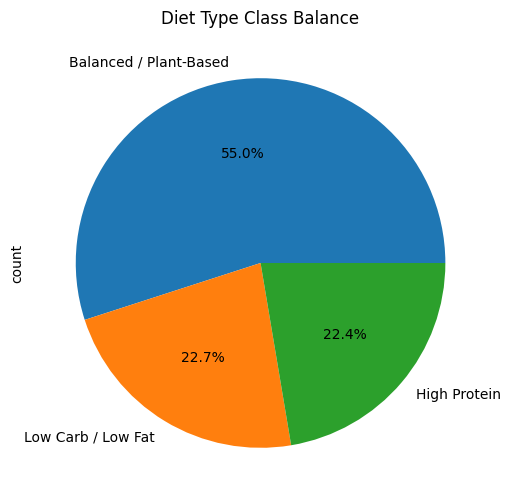

In [ ]:
# Pie chart showing the imbalance in Diet Type classes
diet_df['Diet_Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), title="Diet Type Class Balance")
plt.show()


# Data Preprocessing

> Before training the model, several preprocessing steps were applied to ensure the data was clean, consistent, and suitable for machine learning algorithms. These steps include:

1. **Handling Categorical Variables:** The target variable (Diet_Type) and the user goal (Goal_Label) were encoded into numeric labels using **Label Encoding.**

2. **Handling Class Imbalance:** The dataset initially had uneven distribution across diet types. **SMOTE (Synthetic Minority Oversampling Technique)** was applied to generate synthetic samples and balance the classes. This ensures the model does not favor any particular class.

3. **Feature Scaling:** Numeric features (Age, Gender, Height, Weight, BMI, Fat%, Workout_Frequency) were standardized using **StandardScaler.** Scaling helps machine learning algorithms converge faster and improves model performance, especially for distance-based models like SVM.

4. **Train-Test Split:** The dataset was split into training and testing sets to evaluate the model’s performance on unseen data. This allows for an unbiased assessment of accuracy and generalization.

In [ ]:
# Label Encoding
le_goal = LabelEncoder()
diet_df['Goal_Label'] = le_goal.fit_transform(diet_df['Goal'])

le_diet = LabelEncoder()
diet_df['Diet_Type_Label'] = le_diet.fit_transform(diet_df['Diet_Type'])


In [ ]:
# Display first few rows
diet_df.head()


,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency,Goal,Diet_Type,Goal_Label,Diet_Type_Label
0,30.0,0,1.66,106.2,38.539701,24.0,2.0,Maintain,Balanced / Plant-Based,0,0
1,48.0,0,1.53,99.3,42.419582,30.0,4.0,Muscle Gain,High Protein,1,1
2,50.0,0,1.82,108.0,32.604758,18.0,6.0,Muscle Gain,Balanced / Plant-Based,1,0
3,56.0,1,1.71,80.3,27.461441,16.0,2.0,Muscle Gain,High Protein,1,1
4,54.0,0,1.87,98.2,28.082015,24.0,6.0,Maintain,Balanced / Plant-Based,0,0


In [ ]:
# Dropping the categorical columns (already done label encoding for them)
diet_df = diet_df.drop(['Goal','Diet_Type'], axis=1)

In [ ]:
diet_df.head()

,Age,Gender,Height,Weight,BMI,Fat%,Workout_Frequency,Goal_Label,Diet_Type_Label
0,30.0,0,1.66,106.2,38.539701,24.0,2.0,0,0
1,48.0,0,1.53,99.3,42.419582,30.0,4.0,1,1
2,50.0,0,1.82,108.0,32.604758,18.0,6.0,1,0
3,56.0,1,1.71,80.3,27.461441,16.0,2.0,1,1
4,54.0,0,1.87,98.2,28.082015,24.0,6.0,0,0


In [ ]:
# Show class mappings for Diet Type classes
for i, class_name in enumerate(le_diet.classes_):
    print(f"{class_name} --> {i}")

Balanced / Plant-Based --> 0
High Protein --> 1
Low Carb / Low Fat --> 2


In [ ]:
# Show class mappings for Goal classes
for i, class_name in enumerate(le_goal.classes_):
    print(f"{class_name} --> {i}")

Maintain --> 0
Muscle Gain --> 1
Weight Loss --> 2


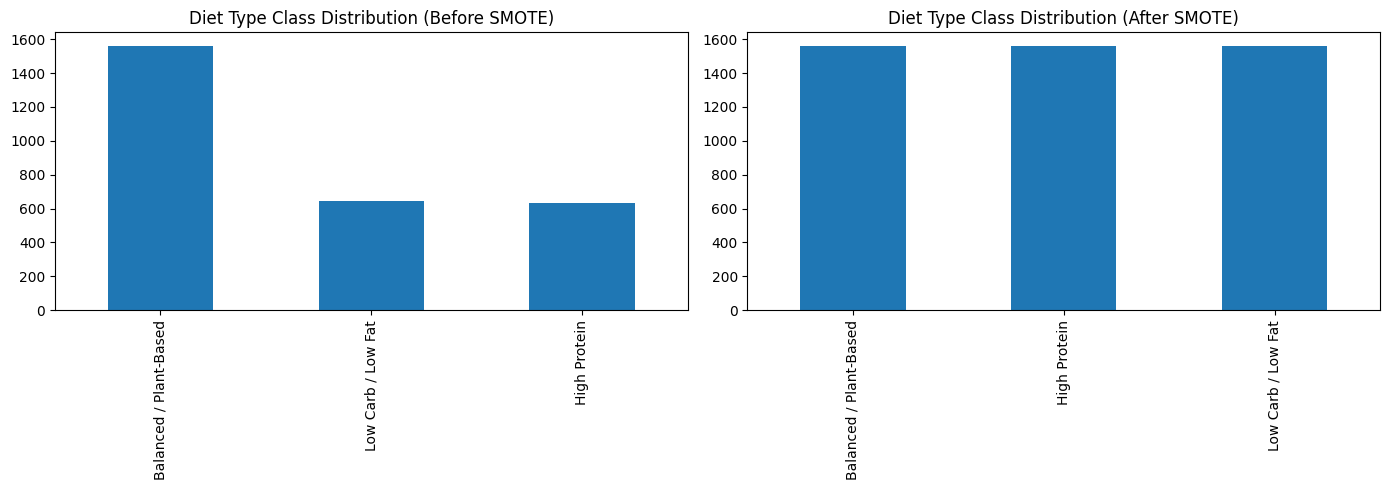

In [ ]:
# Applying SMOTE Technique to solve the imbalance issue

X = diet_df.drop('Diet_Type_Label', axis=1)  # 'Diet_Type' should be label-encoded numeric or one-hot last column
y = diet_df['Diet_Type_Label']               # numeric labels

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Visualize class distribution before SMOTE
diet_names_before = le_diet.inverse_transform(y)
pd.Series(diet_names_before).value_counts().plot.bar(ax=axes[0])
axes[0].set_title("Diet Type Class Distribution (Before SMOTE)")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Visualize class distribution after SMOTE
diet_names_after = le_diet.inverse_transform(y_res)
pd.Series(diet_names_after).value_counts().plot.bar(ax=axes[1])
axes[1].set_title("Diet Type Class Distribution (After SMOTE)")

plt.tight_layout()
plt.show()


In [ ]:
# Checking for diet type labels before going to next step
print(le_diet.classes_) # Output: ['Balanced / Plant-Based' 'High Protein' 'Low Carb / Low Fat']


['Balanced / Plant-Based' 'High Protein' 'Low Carb / Low Fat']


In [ ]:
# checking the number of samples after SMOTE
pd.Series(y_res).value_counts()
len(X_res)

4686

In [ ]:
# Feature Scaling
scaler = StandardScaler()
numeric_features = ['Age','Height', 'Weight', 'BMI', 'Fat%', 'Workout_Frequency']
X_res[numeric_features] = scaler.fit_transform(X_res[numeric_features])


In [ ]:
# Summary Statistics
X_res[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4686.0,2.558773e-16,1.000107,-1.725671,-0.886459,0.036675,0.875888,1.715101
Height,4686.0,-1.152395e-15,1.000107,-1.819564,-0.854335,-0.058627,0.821841,1.849055
Weight,4686.0,5.602764e-16,1.000107,-1.734322,-0.852520,-0.004851,0.813213,1.863595
BMI,4686.0,4.147107e-16,1.000107,-1.909352,-0.755824,-0.131664,0.669893,2.809406
Fat%,4686.0,2.729357e-17,1.000107,-1.769093,-0.906315,0.085909,0.835728,2.968296
Workout_Frequency,4686.0,8.870412e-17,1.000107,-1.565055,-0.937769,0.090365,0.944088,1.571374


In [ ]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    random_state=42,
    stratify=y_res  # ensures equal class distribution in train/test
)


In [ ]:
# Checking the Training/Test set size
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Check class distribution
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(pd.Series(y_test).value_counts(normalize=True))


Training set size: 3748
Testing set size: 938

Class distribution in training set:
Diet_Type_Label
0    0.333511
2    0.333244
1    0.333244
Name: proportion, dtype: float64

Class distribution in testing set:
Diet_Type_Label
1    0.333689
2    0.333689
0    0.332623
Name: proportion, dtype: float64


In [ ]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


# Model Selection and Training

>  After preprocessing the data, several machine learning algorithms were explored to predict the **Diet_Type.** The goal was to identify the model that provides the **highest accuracy** while handling the multi-class classification problem.

### Algorithms Used


*   **Logistic Regression:** A linear model suitable for multi-class classification using one-vs-rest strategy.

*   **Random Forest:** Ensemble of decision trees to reduce overfitting and improve accuracy.
*   **Support Vector Machine (SVM):** Finds an optimal hyperplane to separate classes, effective in high-dimensional space.
*   **K-Nearest Neighbors (KNN):** Classifies based on the majority class among the nearest neighbors.

### Training Approach

*   **Hyperparameter Tuning:** GridSearchCV was used for SVM and Random Forest to find the optimal combination of hyperparameters. A **tqdm progress bar** was used during tuning for better visualization of progress

*   **Evaluation Metrics:** Accuracy, confusion matrix, and classification reports were used to compare models.





In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc})
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("\n")

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(results_df)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       312
           1       0.84      0.64      0.73       313
           2       0.83      0.98      0.90       313

    accuracy                           0.77       938
   macro avg       0.78      0.77      0.77       938
weighted avg       0.78      0.77      0.77       938



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       312
           1       0.84      0.97      0.90       313
           2       0.83      0.96      0.89       313

    accuracy                           0.86       938
   macro avg       0.86      0.86      0.85       938
weighted avg       0.86      0.86      0.85       938



=== SVM ===
              precision    recall  f1-score   support

           0       0.98      0.60      0.74       312
           1       0.82      0.99      0.90       313
         

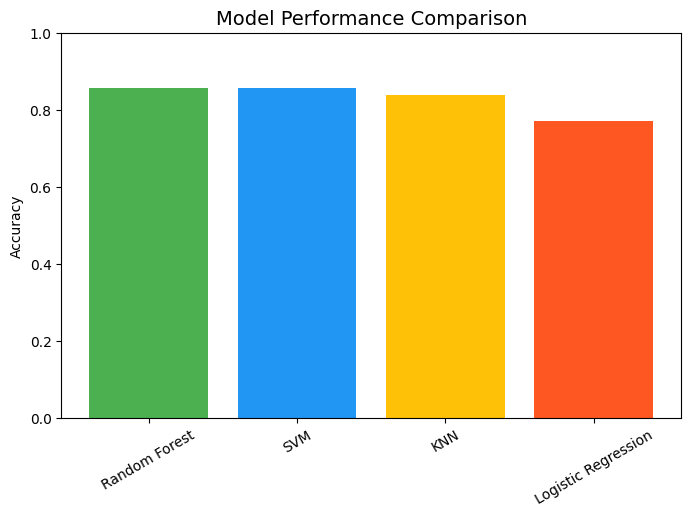

In [ ]:
# Model Performance Comparison
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Accuracy'], color=['#4CAF50','#2196F3','#FFC107','#FF5722'])
plt.title('Model Performance Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.show()


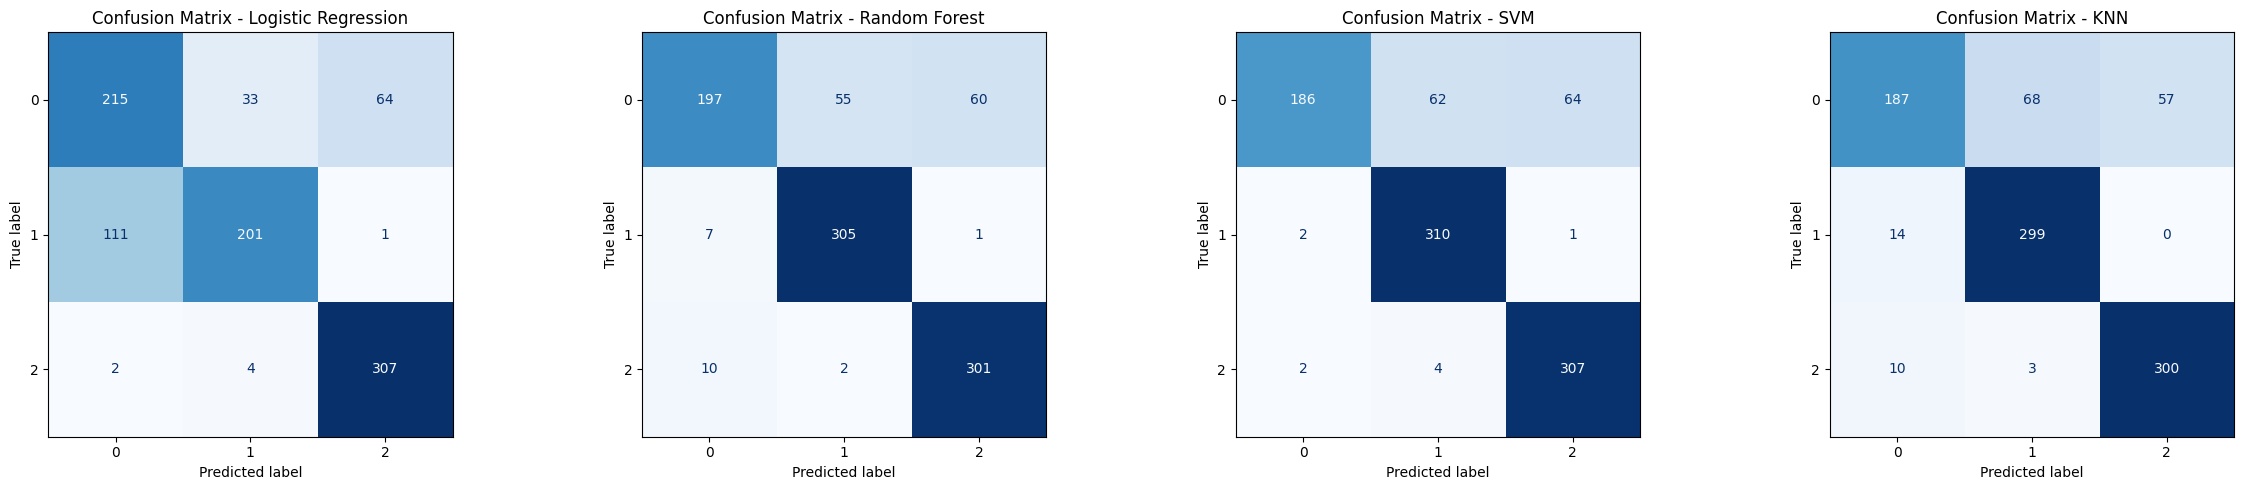

In [ ]:
# Number of models
num_models = len(models)

# Create subplots
fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5))

# If there's only one model, axes won't be a list
if num_models == 1:
    axes = [axes]

# Loop through each model
for ax, (name, model) in zip(axes, models.items()):
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot on subplot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()



# Fine-Tuning and Hyperparameter Optimization

* After evaluating multiple machine learning algorithms, the top-performing models (Random Forest and SVM) were selected for fine-tuning to maximize their performance.

### Hyperparameters Considered


*   **Random Forest:**
> n_estimators (number of trees),
> max_depth (maximum depth of a tree),
> min_samples_split (minimum samples to split a node),
> min_samples_leaf (minimum samples in a leaf node),
> bootstrap (whether to use bootstrap samples)

*  **SVM:**
> C (regularization parameter),
> kernel (linear, RBF, polynomial),
> gamma (kernel coefficient)




###  GridSearchCV Method


 Tuning Random Forest using GridSearchCV...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

 Best RF Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
 Best RF CV Accuracy: 0.8565

 Tuning SVM using GridSearchCV...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

 Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
 Best SVM CV Accuracy: 0.8575

🎯 Final Best Model: SVM

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.60      0.74       312
           1       0.82      0.99      0.90       313
           2       0.83      0.98      0.90       313

    accuracy                           0.86       938
   macro avg       0.88      0.86      0.85       938
weighted avg       0.88      0.86      0.85       938

 Final Test Accuracy: 0.8561


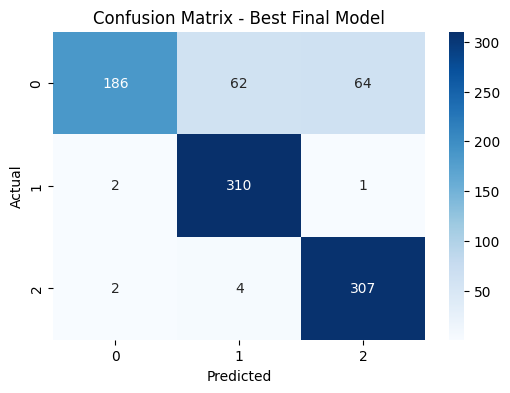

In [ ]:
from sklearn.model_selection import GridSearchCV

# ==============================
#   RANDOM FOREST TUNING
# ==============================

rf_param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

print("\n Tuning Random Forest using GridSearchCV...")

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

best_rf_params = rf_grid.best_params_
best_rf_acc = rf_grid.best_score_

print("\n Best RF Params:", best_rf_params)
print(f" Best RF CV Accuracy: {best_rf_acc:.4f}")


# ==============================
#   SVM TUNING
# ==============================

svm_param_grid = {
    'C': [0.1, 1, 5, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

print("\n Tuning SVM using GridSearchCV...")

svm_grid = GridSearchCV(
    estimator=SVC(),
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train, y_train)

best_svm_params = svm_grid.best_params_
best_svm_acc = svm_grid.best_score_

print("\n Best SVM Params:", best_svm_params)
print(f" Best SVM CV Accuracy: {best_svm_acc:.4f}")


# ==============================
#   FINAL MODEL SELECTION
# ==============================

if best_rf_acc > best_svm_acc:
    print("\n🎯 Final Best Model: Random Forest")
    best_model = RandomForestClassifier(random_state=42, **best_rf_params)
else:
    print("\n🎯 Final Best Model: SVM")
    best_model = SVC(**best_svm_params)

# Training the chosen model
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)

acc_final = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)

print("\n Classification Report:\n", classification_report(y_test, y_pred_final))
print(f" Final Test Accuracy: {acc_final:.4f}")

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Best Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



 Evaluating Final Model on Test Data...
 Final Model Test Accuracy: 0.8561

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.60      0.74       312
           1       0.82      0.99      0.90       313
           2       0.83      0.98      0.90       313

    accuracy                           0.86       938
   macro avg       0.88      0.86      0.85       938
weighted avg       0.88      0.86      0.85       938



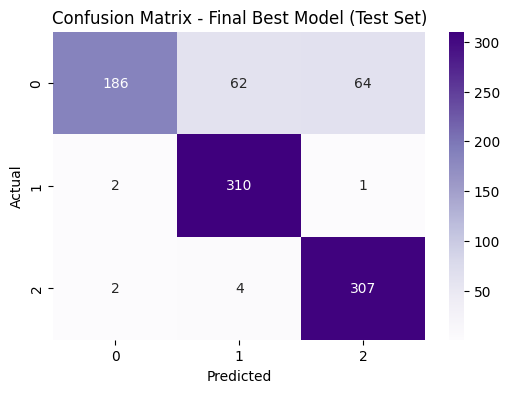

In [ ]:
# ---------- TESTING ----------
print("\n Evaluating Final Model on Test Data...")

# Predict on test set
y_pred_final = best_model.predict(X_test)

# Calculate accuracy
final_acc = accuracy_score(y_test, y_pred_final)

# Show results
print(f" Final Model Test Accuracy: {final_acc:.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred_final))

# ---------- CONFUSION MATRIX ----------
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - Final Best Model (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Saving the model

In [ ]:
joblib.dump(best_model, "diet_model.pkl")
print("Model saved as diet_model.pkl")


Model saved as diet_model.pkl


# Extra part ( Trying with real data on the model to check the accuracy )

In [ ]:
# -------------------- 20 Realistic Example Users --------------------
real_examples = pd.DataFrame([
    [22, 1, 1.78, 70, 22.1, 14, 5, 2],
    [35, 0, 1.65, 75, 27.5, 28, 2, 1],
    [45, 1, 1.80, 80, 24.7, 18, 3, 3],
    [28, 0, 1.70, 68, 23.5, 20, 4, 2],
    [40, 1, 1.60, 60, 23.4, 22, 1, 1],
    [30, 0, 1.75, 72, 23.5, 15, 6, 3],
    [25, 1, 1.68, 58, 20.5, 12, 5, 2],
    [50, 0, 1.72, 85, 28.7, 30, 2, 1],
    [33, 1, 1.65, 62, 22.8, 18, 3, 3],
    [29, 0, 1.80, 78, 24.1, 16, 4, 2],
    [38, 1, 1.70, 65, 22.5, 19, 3, 3],
    [27, 0, 1.74, 80, 26.4, 25, 4, 1],
    [31, 1, 1.68, 60, 21.3, 14, 5, 2],
    [42, 0, 1.76, 90, 29.1, 32, 2, 1],
    [36, 1, 1.66, 63, 22.9, 17, 3, 3],
    [24, 0, 1.80, 75, 23.1, 15, 6, 2],
    [39, 1, 1.62, 55, 20.9, 13, 4, 3],
    [32, 0, 1.78, 82, 25.8, 27, 3, 1],
    [26, 1, 1.69, 64, 22.4, 16, 5, 2],
    [41, 0, 1.75, 88, 28.7, 30, 2, 1]
], columns=['Age','Gender','Height','Weight','BMI','Fat%','Workout_Frequency','Goal_Label'])

# -------------------- Expected Diet Types --------------------
# Based on general fitness rules:
# High Protein → Muscle Gain, Low-Carb → Weight Loss, Balanced → Maintain
expected_diets = [
    'High Protein', 'Low-Carb', 'Balanced', 'High Protein', 'Low-Carb',
    'Balanced', 'High Protein', 'Low-Carb', 'Balanced', 'High Protein',
    'Balanced', 'Low-Carb', 'High Protein', 'Low-Carb', 'Balanced',
    'High Protein', 'Balanced', 'Low-Carb', 'High Protein', 'Low-Carb'
]

real_examples['Expected_Diet'] = expected_diets

# Display the DataFrame
print(real_examples)


    Age  Gender  Height  Weight   BMI  Fat%  Workout_Frequency  Goal_Label  \
0    22       1    1.78      70  22.1    14                  5           2   
1    35       0    1.65      75  27.5    28                  2           1   
2    45       1    1.80      80  24.7    18                  3           3   
3    28       0    1.70      68  23.5    20                  4           2   
4    40       1    1.60      60  23.4    22                  1           1   
5    30       0    1.75      72  23.5    15                  6           3   
6    25       1    1.68      58  20.5    12                  5           2   
7    50       0    1.72      85  28.7    30                  2           1   
8    33       1    1.65      62  22.8    18                  3           3   
9    29       0    1.80      78  24.1    16                  4           2   
10   38       1    1.70      65  22.5    19                  3           3   
11   27       0    1.74      80  26.4    25                  4  

In [ ]:
# Update Goal_Label according to your mapping
# Old mapping in the DataFrame: just reorder numbers to match 0=Maintain,1=Muscle Gain,2=Weight Loss
# We'll replace previous Goal_Label with correct numeric labels

real_examples['Goal_Label'] = [
    1, 2, 0, 1, 2,
    0, 1, 2, 0, 1,
    0, 2, 1, 2, 0,
    1, 0, 2, 1, 2
]

# Display updated DataFrame
print(real_examples)


    Age  Gender  Height  Weight   BMI  Fat%  Workout_Frequency  Goal_Label  \
0    22       1    1.78      70  22.1    14                  5           1   
1    35       0    1.65      75  27.5    28                  2           2   
2    45       1    1.80      80  24.7    18                  3           0   
3    28       0    1.70      68  23.5    20                  4           1   
4    40       1    1.60      60  23.4    22                  1           2   
5    30       0    1.75      72  23.5    15                  6           0   
6    25       1    1.68      58  20.5    12                  5           1   
7    50       0    1.72      85  28.7    30                  2           2   
8    33       1    1.65      62  22.8    18                  3           0   
9    29       0    1.80      78  24.1    16                  4           1   
10   38       1    1.70      65  22.5    19                  3           0   
11   27       0    1.74      80  26.4    25                  4  

In [ ]:
print(le_diet.classes_)  # should include ['Balanced / Plant-Based' 'High Protein' 'Low Carb / Low Fat']

['Balanced / Plant-Based' 'High Protein' 'Low Carb / Low Fat']


In [ ]:
all_labels = ['Balanced', 'High Protein', 'Low-Carb']
le_diet = LabelEncoder()
le_diet.fit(all_labels)  # ensures all labels are known


LabelEncoder()

In [ ]:
diet_labels = ['Maintain' 'Muscle Gain' 'Weight Loss']
le_goal = LabelEncoder()
le_goal.fit(diet_labels)  # ensures all labels are known

LabelEncoder()

In [ ]:
# -------------------- Step 1: Example Data --------------------
# real_examples already defined and Goal_Label corrected
# Columns: Age, Gender, Height, Weight, BMI, Fat%, Workout_Frequency, Goal_Label, Expected_Diet

# -------------------- Step 2: Prepare features and target --------------------
X_real = real_examples.drop('Expected_Diet', axis=1)

# -------------------- Step 3: Scale numeric features --------------------
# Define numeric features
numeric_features = ['Age','Height','Weight','BMI','Fat%','Workout_Frequency']

# Use the same scaler from training
X_real[numeric_features] = scaler.transform(X_real[numeric_features])

# -------------------- Step 4: Predict --------------------
# Predict numeric labels
y_pred_numeric = best_model.predict(X_real)

# Convert predictions back to human-readable diet type names
y_pred_names = le_diet.inverse_transform(y_pred_numeric)

# -------------------- Step 5: Compare with Expected --------------------
real_examples['Predicted_Diet'] = y_pred_names

# Convert Expected_Diet to numeric labels using the same encoder
y_true_numeric = le_diet.transform(real_examples['Expected_Diet'])

# -------------------- Step 6: Evaluate --------------------
acc = accuracy_score(y_true_numeric, y_pred_numeric)
print(f" Accuracy on 20 real examples: {acc:.4f}\n")
print(" Classification Report:\n", classification_report(y_true_numeric, y_pred_numeric, target_names=le_diet.classes_))

# -------------------- Step 7: Display predictions --------------------
print(real_examples)


 Accuracy on 20 real examples: 1.0000

 Classification Report:
               precision    recall  f1-score   support

    Balanced       1.00      1.00      1.00         6
High Protein       1.00      1.00      1.00         7
    Low-Carb       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

    Age  Gender  Height  Weight   BMI  Fat%  Workout_Frequency  Goal_Label  \
0    22       1    1.78      70  22.1    14                  5           1   
1    35       0    1.65      75  27.5    28                  2           2   
2    45       1    1.80      80  24.7    18                  3           0   
3    28       0    1.70      68  23.5    20                  4           1   
4    40       1    1.60      60  23.4    22                  1           2   
5    30       0    1.75      72  23.5    15                  6           0   
6    25  

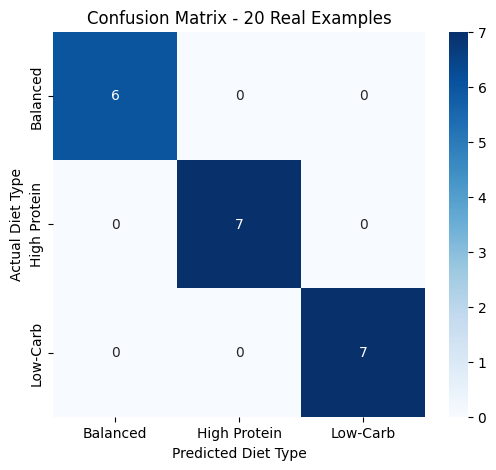

In [ ]:
# -------------------- Confusion Matrix --------------------
cm = confusion_matrix(y_true_numeric, y_pred_numeric)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_diet.classes_,
            yticklabels=le_diet.classes_)
plt.xlabel("Predicted Diet Type")
plt.ylabel("Actual Diet Type")
plt.title("Confusion Matrix - 20 Real Examples")
plt.show()
